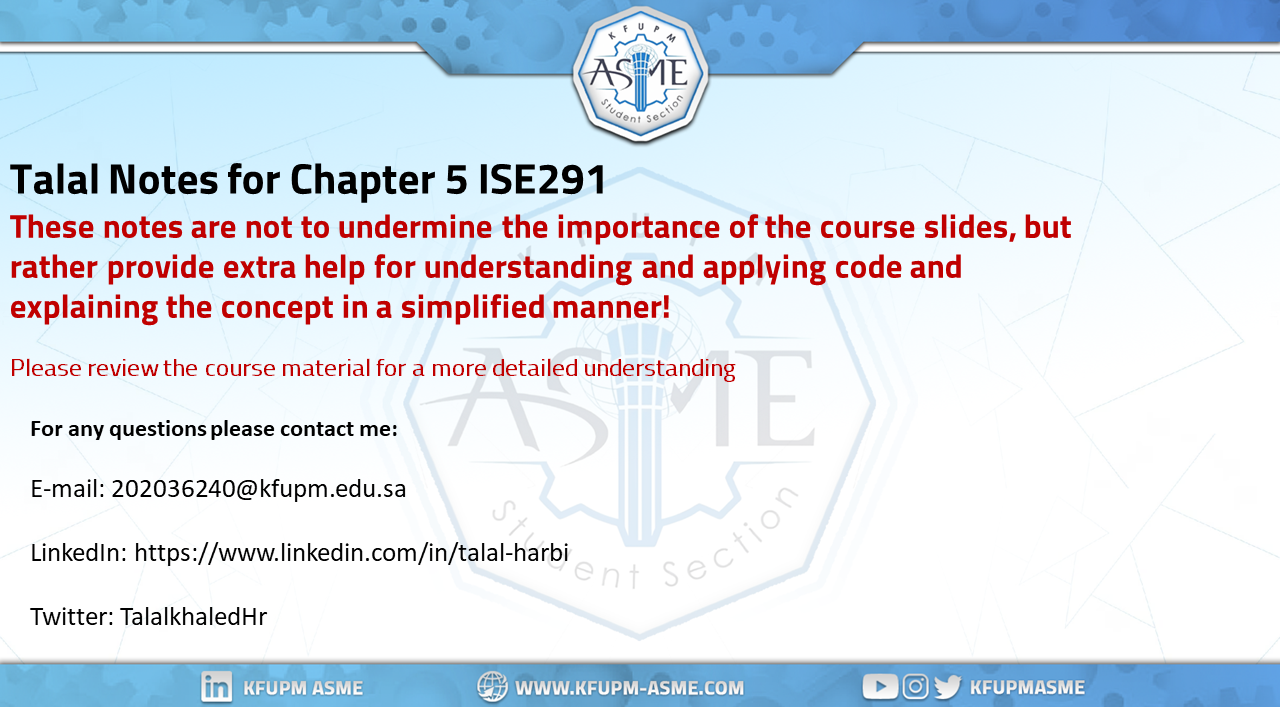

# Data transformation

### We use data transformation in the data preparation step by preparing the data in a format a machine can understand

- Standard Scaling
    -  Removes the mean and scales each column/variable to unit variance to  resize the distribution of values to make the mean equal to 0 and the variance equal 1
        - (data value - actual mean)/actual variance <img src="img/Standardization.png" width=220 height=110/>
- Label Encoding
    - Each categorical data (label) gets transformed into a number, the numbering depends on how many unique values a column has
        - A column of (Banana, Apple, Orange) transforms into >> (0,1,2)
- One Hot Encoding
    - Almost similar to label encoding, but it creates new columns with a value of 1 of the specific value of that column, and 0 for other values
        - <img src="img/ISE291_CH5_IMG1.png" width=440 height=110/>
- Min-Max Scaler is a way to normalize the input variables/columns
    - <img src="img/ISE291_CH5_IMG2.png" width=250 height=110/>

# Data Preprocessing
>  Real world data is often *dirty* and needs preprocessing before its desired usage.

What makes data *dirty*:
1. Incomplete
2. Noise
3. Inconsistency 

## Data Scrubbing/Cleaning

Following are different ways to clean data:

1. Handling missing data: Global constant, Ignoring, Imputing or Inference approach.
2. Filtering noisy data: Identifying outliers and removing from database.
3. Munging or Wrangling: Involves reformatting data into usable format.

## Let us apply data cleaning and data transformation using our data

In [14]:
import pandas as pd
df = pd.read_csv('data/Dataset-1.csv', delimiter = ',')
display(df.head(7))

Country     Population  Overall Life  Male Life  \
0  People's Republic of China  1,433,783,686          75.5       73.5   
1                       India  1,366,417,754          68.5       67.3   
2               United States    329,064,917          79.8       77.5   
3                   Indonesia    270,625,568          72.7       67.3   
4                    Pakistan    216,565,318          67.7       65.8   
5                      Brazil    211,049,527           NaN       70.2   
6                     Nigeria    200,963,599          53.4      -52.4   

   Female Life      Continent           Subregion  
0         77.9            NaN        Eastern Asia  
1         69.8           Asia       Southern Asia  
2         82.1  North America    Northern America  
3         69.8            NaN  South-eastern Asia  
4         69.8           Asia       Southern Asia  
5         77.5  South America       South America  
6         54.5         Africa      Western Africa

### Identify the following

- Noise
- Incomplete (Missing data)
- Inconsistency

In [15]:
## To apply mathematical equations on column "Population", we must not have a " , "
## Use a lambda function to resolve the issue

df["Population"]=df["Population"].apply(lambda x: int(x.replace(",","")))
display(df.head(7))

Country  Population  Overall Life  Male Life  \
0  People's Republic of China  1433783686          75.5       73.5   
1                       India  1366417754          68.5       67.3   
2               United States   329064917          79.8       77.5   
3                   Indonesia   270625568          72.7       67.3   
4                    Pakistan   216565318          67.7       65.8   
5                      Brazil   211049527           NaN       70.2   
6                     Nigeria   200963599          53.4      -52.4   

   Female Life      Continent           Subregion  
0         77.9            NaN        Eastern Asia  
1         69.8           Asia       Southern Asia  
2         82.1  North America    Northern America  
3         69.8            NaN  South-eastern Asia  
4         69.8           Asia       Southern Asia  
5         77.5  South America       South America  
6         54.5         Africa      Western Africa

In [16]:
## Any negative numeric value should be replaced by its absolute value, like column 6 in male life

seleted_cols= df.select_dtypes(exclude='object').columns
df[seleted_cols]=df[seleted_cols].applymap(lambda x: x if x>=0 else abs(x))
display(df.head(7))

Country  Population  Overall Life  Male Life  \
0  People's Republic of China  1433783686          75.5       73.5   
1                       India  1366417754          68.5       67.3   
2               United States   329064917          79.8       77.5   
3                   Indonesia   270625568          72.7       67.3   
4                    Pakistan   216565318          67.7       65.8   
5                      Brazil   211049527           NaN       70.2   
6                     Nigeria   200963599          53.4       52.4   

   Female Life      Continent           Subregion  
0         77.9            NaN        Eastern Asia  
1         69.8           Asia       Southern Asia  
2         82.1  North America    Northern America  
3         69.8            NaN  South-eastern Asia  
4         69.8           Asia       Southern Asia  
5         77.5  South America       South America  
6         54.5         Africa      Western Africa

In [17]:
## There exists null (missing) values. NaN

## Copy the code in course notes

null_columns=df.columns[df.isna().any()]
print('Columns with NaN values are:', null_columns)

#fill NaN values with mean or mode (only works for single missing value in categorical variable)
#for c in null_columns:
#   value = df[c].mean() if df[c].dtype!='object' else df[c].mode()
#   df[c].fillna(value,inplace=True)
    
#fill NaN values with mean or mode (modified)
for c in null_columns:
    if df[c].dtype!='object':
        value = df[c].mean()
    else:
        value = df[c].mode()
        #print (value)
        value = value[0]  #0 will be the row(s) name
        #print (value)
    df[c].fillna(value,inplace=True)

display(df.head(7))

Columns with NaN values are: Index(['Overall Life', 'Continent'], dtype='object')


Country  Population  Overall Life  Male Life  \
0  People's Republic of China  1433783686     75.500000       73.5   
1                       India  1366417754     68.500000       67.3   
2               United States   329064917     79.800000       77.5   
3                   Indonesia   270625568     72.700000       67.3   
4                    Pakistan   216565318     67.700000       65.8   
5                      Brazil   211049527     69.163292       70.2   
6                     Nigeria   200963599     53.400000       52.4   

   Female Life      Continent           Subregion  
0         77.9           Asia        Eastern Asia  
1         69.8           Asia       Southern Asia  
2         82.1  North America    Northern America  
3         69.8           Asia  South-eastern Asia  
4         69.8           Asia       Southern Asia  
5         77.5  South America       South America  
6         54.5         Africa      Western Africa

In [19]:
display(df)

Country  Population  Overall Life  Male Life  \
0   People's Republic of China  1433783686     75.500000     73.500   
1                        India  1366417754     68.500000     67.300   
2                United States   329064917     79.800000     77.500   
3                    Indonesia   270625568     72.700000     67.300   
4                     Pakistan   216565318     67.700000     65.800   
5                       Brazil   211049527     69.163292     70.200   
6                      Nigeria   200963599     53.400000     52.400   
7                   Bangladesh   163046161     73.200000     71.000   
8                       Russia   145872256     70.300000     64.300   
9                       Mexico   127575529     75.900000     73.100   
10                      Jersey   126860301      0.819000      0.794   
11                    Ethiopia   112078730     62.200000     59.800   
12                 Philippines   108116615     69.200000     65.700   
13                       Egypt   100388073     72.700000     71.400   
14                     Germany    83517045     80.700000     78.400   
15                      Turkey    83429615     74.800000     72.500   
16                        Iran    82913906     71.400000     69.800   
17                    Thailand    69037513     74.700000     71.500   
18              United Kingdom    67530172     80.700000     78.500   
19        France, metropolitan    65129728     81.800000     78.700   
20                       Italy    60550075     82.200000     79.600   
21                South Africa    58558270     63.100000     61.600   
22                    Tanzania    58005463     62.200000     60.800   
23                       Kenya    52573973     64.000000     62.600   
24                 South Korea    51225308     82.400000     79.300   

    Female Life      Continent           Subregion  
0        77.900           Asia        Eastern Asia  
1        69.800           Asia       Southern Asia  
2        82.100  North America    Northern America  
3        69.800           Asia  South-eastern Asia  
4        69.800           Asia       Southern Asia  
5        77.500  South America       South America  
6        54.500         Africa      Western Africa  
7        75.400           Asia       Southern Asia  
8        76.400           Asia      Eastern Europe  
9        78.800  North America     Central America  
10        0.845         Europe        Eastern Asia  
11       64.700         Africa      Eastern Africa  
12       72.900           Asia  South-eastern Asia  
13       74.200         Africa     Northern Africa  
14       83.100         Europe      Western Europe  
15       77.300           Asia        Western Asia  
16       73.100           Asia       Southern Asia  
17       78.000           Asia  South-eastern Asia  
18       83.000         Europe     Northern Europe  
19       85.100         Europe      Western Europe  
20       85.000         Europe     Southern Europe  
21       64.600         Africa     Southern Africa  
22       63.600         Africa      Eastern Africa  
23       65.500         Africa      Eastern Africa  
24       85.800           Asia        Eastern Asia

In [21]:
## An inconsistency we have is that we show all life columns as percentages. However, there are columns where we have fractions
## column indexed 10

seleted_cols = df.loc[:,"Overall Life":"Female Life"].columns ## select "Life" columns

df[seleted_cols]=df[seleted_cols].applymap(lambda x: x if x>1 else 100*x) ## Apply function
display(df.head(19))

Country  Population  Overall Life  Male Life  \
0   People's Republic of China  1433783686     75.500000       73.5   
1                        India  1366417754     68.500000       67.3   
2                United States   329064917     79.800000       77.5   
3                    Indonesia   270625568     72.700000       67.3   
4                     Pakistan   216565318     67.700000       65.8   
5                       Brazil   211049527     69.163292       70.2   
6                      Nigeria   200963599     53.400000       52.4   
7                   Bangladesh   163046161     73.200000       71.0   
8                       Russia   145872256     70.300000       64.3   
9                       Mexico   127575529     75.900000       73.1   
10                      Jersey   126860301     81.900000       79.4   
11                    Ethiopia   112078730     62.200000       59.8   
12                 Philippines   108116615     69.200000       65.7   
13                       Egypt   100388073     72.700000       71.4   
14                     Germany    83517045     80.700000       78.4   
15                      Turkey    83429615     74.800000       72.5   
16                        Iran    82913906     71.400000       69.8   
17                    Thailand    69037513     74.700000       71.5   
18              United Kingdom    67530172     80.700000       78.5   

    Female Life      Continent           Subregion  
0          77.9           Asia        Eastern Asia  
1          69.8           Asia       Southern Asia  
2          82.1  North America    Northern America  
3          69.8           Asia  South-eastern Asia  
4          69.8           Asia       Southern Asia  
5          77.5  South America       South America  
6          54.5         Africa      Western Africa  
7          75.4           Asia       Southern Asia  
8          76.4           Asia      Eastern Europe  
9          78.8  North America     Central America  
10         84.5         Europe        Eastern Asia  
11         64.7         Africa      Eastern Africa  
12         72.9           Asia  South-eastern Asia  
13         74.2         Africa     Northern Africa  
14         83.1         Europe      Western Europe  
15         77.3           Asia        Western Asia  
16         73.1           Asia       Southern Asia  
17         78.0           Asia  South-eastern Asia  
18         83.0         Europe     Northern Europe

## How to use the above-mentioned scalers in python

In [45]:
df = pd.read_csv('data/Dataset-2.csv', delimiter = ',')

display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         4521 non-null   int64 
 1   job         4521 non-null   object
 2   marital     4521 non-null   object
 3   education   4521 non-null   object
 4   default     4521 non-null   object
 5   balance     4521 non-null   int64 
 6   housing     4521 non-null   object
 7   loan        4521 non-null   object
 8   subscribed  4521 non-null   object
dtypes: int64(2), object(7)
memory usage: 318.0+ KB


None

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [46]:
## Use Min-Max scaler to normalize the age column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() ## Scaler identification
scaler.fit(df[['age']]) ## Fitting the scaler to the "age" column
df['age']=scaler.transform(df[['age']])

display(df.head())

age          job  marital  education default  balance housing loan  \
0  0.161765   unemployed  married    primary      no     1787      no   no   
1  0.205882     services  married  secondary      no     4789     yes  yes   
2  0.235294   management   single   tertiary      no     1350     yes   no   
3  0.161765   management  married   tertiary      no     1476     yes  yes   
4  0.588235  blue-collar  married  secondary      no        0     yes   no   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [47]:
## Use Standard Scaler to normalize the balance column

from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()## Scaler identification
scaler2.fit(df[['balance']])## Fitting the scaler to the "balance" column
df['balance']=scaler2.transform(df[['balance']])
display(df.head())

age          job  marital  education default   balance housing loan  \
0  0.161765   unemployed  married    primary      no  0.121072      no   no   
1  0.205882     services  married  secondary      no  1.118644     yes  yes   
2  0.235294   management   single   tertiary      no -0.024144     yes   no   
3  0.161765   management  married   tertiary      no  0.017726     yes  yes   
4  0.588235  blue-collar  married  secondary      no -0.472753     yes   no   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [48]:
## Use lable encoding in the subscribed column>> 0 for no, and 1 for yes

from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
encoder1.fit(df['subscribed'])
df['subscribed']=encoder1.transform(df['subscribed'])
display(df.head())

age          job  marital  education default   balance housing loan  \
0  0.161765   unemployed  married    primary      no  0.121072      no   no   
1  0.205882     services  married  secondary      no  1.118644     yes  yes   
2  0.235294   management   single   tertiary      no -0.024144     yes   no   
3  0.161765   management  married   tertiary      no  0.017726     yes  yes   
4  0.588235  blue-collar  married  secondary      no -0.472753     yes   no   

   subscribed  
0           0  
1           0  
2           0  
3           0  
4           0

<span style = 'color:red'> **One hot encoding is achieved differently** </span>

In [49]:
df = pd.get_dummies(df, columns=['job'],drop_first=True)

## get_dummies is derived from the concept of dummy variables (not explained in this course)

display(df)

age  marital  education default   balance housing loan  subscribed  \
0     0.161765  married    primary      no  0.121072      no   no           0   
1     0.205882  married  secondary      no  1.118644     yes  yes           0   
2     0.235294   single   tertiary      no -0.024144     yes   no           0   
3     0.161765  married   tertiary      no  0.017726     yes  yes           0   
4     0.588235  married  secondary      no -0.472753     yes   no           0   
...        ...      ...        ...     ...       ...     ...  ...         ...   
4516  0.205882  married  secondary      no -0.583410     yes   no           0   
4517  0.558824  married   tertiary     yes -1.573671     yes  yes           0   
4518  0.558824  married  secondary      no -0.374724      no   no           0   
4519  0.132353  married  secondary      no -0.094925      no   no           0   
4520  0.367647   single   tertiary      no -0.095257     yes  yes           0   

      job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                   0                 0              0               0   
1                   0                 0              0               0   
2                   0                 0              0               1   
3                   0                 0              0               1   
4                   1                 0              0               0   
...               ...               ...            ...             ...   
4516                0                 0              0               0   
4517                0                 0              0               0   
4518                0                 0              0               0   
4519                1                 0              0               0   
4520                0                 1              0               0   

      job_retired  job_self-employed  job_services  job_student  \
0               0                  0             0            0   
1               0                  0             1            0   
2               0                  0             0            0   
3               0                  0             0            0   
4               0                  0             0            0   
...           ...                ...           ...          ...   
4516            0                  0             1            0   
4517            0                  1             0            0   
4518            0                  0             0            0   
4519            0                  0             0            0   
4520            0                  0             0            0   

      job_technician  job_unemployed  job_unknown  
0                  0               1            0  
1                  0               0            0  
2                  0               0            0  
3                  0               0            0  
4                  0               0            0  
...              ...             ...          ...  
4516               0               0            0  
4517               0               0            0  
4518               1               0            0  
4519               0               0            0  
4520               0               0            0  

[4521 rows x 19 columns]

### “The only place success comes before work is in the dictionary.” ― Vince Lombardi.

### For any questions please contact me:

E-mail: 202036240@kfupm.edu.sa

LinkedIn: https://www.linkedin.com/in/talal-harbi

Twitter: TalalkhaledHr